#### A) Loading the necessary libraries.

In [117]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go


#### B) Loading the data.

In [118]:
# import the data
df = pd.read_excel("Risk Analyst Case study_092025.xlsx")

# Convert dates
df["refdate"] = pd.to_datetime(df["refdate"], format="%d/%m/%Y", errors="coerce")

# Sort by date and asset
df = df.sort_values(["refdate", "Asset Name"]).reset_index(drop=True)

# Clean numerical issues
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

# Keep a clean copy
df1 = df.copy()


### 0) Validating some of the risk inputs.

In [119]:
#Risk contributions should sum to approx 100% per day
risk_check = df1.groupby("refdate")["%Contribution to Total Risk"].sum()

print("Risk contribution check (sum per day):")
print(risk_check.head())
print(risk_check.tail())


Risk contribution check (sum per day):
refdate
2022-09-29    1.0000
2022-09-30    0.9999
2022-10-03    0.9998
2022-10-04    1.0000
2022-10-05    1.0000
Name: %Contribution to Total Risk, dtype: float64
refdate
2023-03-24    0.9998
2023-03-27    0.9999
2023-03-28    1.0000
2023-03-29    0.9999
2023-03-30    1.0000
Name: %Contribution to Total Risk, dtype: float64


### 1.) Identifying the portfolio's risk drivers.

In [121]:
# a) Asset-level risk contribution 

asset_risk = df1.groupby("Asset Name")["%Contribution to Total Risk"].sum().sort_values(ascending=False).reset_index()
asset_active_risk = df1.groupby("Asset Name")["%Contribution to Active Total Risk"].sum().sort_values(ascending=False).reset_index()

print(asset_risk.head(20))
print(asset_active_risk.head(20))



#plots
active_risk_plot = alt.Chart(asset_active_risk.head(20)).mark_bar().encode(
    x='%Contribution to Active Total Risk:Q',
    y=alt.Y('Asset Name:N', sort='-x'),
    tooltip=['Asset Name','%Contribution to Active Total Risk']
).properties(title='Top 20 Active Risk Contributors')


asset_plot= alt.Chart(asset_risk.head(20)).mark_bar().encode(
    x='%Contribution to Total Risk:Q',
    y=alt.Y('Asset Name:N', sort='-x'),
    tooltip=['Asset Name','%Contribution to Total Risk']
).properties(title='Top 20 Assets by Total Risk Contribution (Cumulative)')

# asset_plot
active_risk_plot

                                Asset Name  %Contribution to Total Risk
0     TAIWAN SEMICONDUCTOR MANUFACT CO LTD                      12.2154
1                     TENCENT HOLDINGS LTD                      11.2980
2                ALIBABA GROUP HOLDING LTD                      10.8343
3               SAMSUNG ELECTRONICS CO LTD                       9.5784
4                                  MEITUAN                       6.2798
5    PING AN INSURANCE GRP CO OF CHINA LTD                       5.0866
6                         MERCADOLIBRE INC                       4.6760
7                       SAMSUNG SDI CO LTD                       3.9579
8   KINGDEE INTERNATNL SOFTWARE GRP CO LTD                       3.8017
9   BANK RAKYAT INDONESIA (PERSERO) TBK PT                       3.6357
10                             SEA LIMITED                       3.4859
11           LG HOUSEHOLD & HEALTHCARE LTD                       3.4590
12                           AIA GROUP LTD                      

alt.Chart(...)

In [122]:
# b) Sector-level risk contribution

sector_risk_total = df1.groupby("GICS_sector")["%Contribution to Total Risk"].sum().sort_values(ascending=False).reset_index()
print(sector_risk_total.head(10))

# plot
sector_plot= alt.Chart(sector_risk_total).mark_bar().encode(
    x=alt.X('%Contribution to Total Risk:Q', title='Risk Contribution (%)'),
    y=alt.Y('GICS_sector:N', sort='-x', title='Sector'),
    tooltip=['GICS_sector', '%Contribution to Total Risk']
).properties(
    title='Sector-Level Risk Contribution (Cumulative)'
)

sector_plot


              GICS_sector  %Contribution to Total Risk
0  Information Technology                      40.6430
1              Financials                      34.0385
2  Consumer Discretionary                      28.0738
3  Communication Services                      17.2990
4        Consumer Staples                       9.8229
5               Materials                       3.3773
6             Health Care                       1.7211
7             Industrials                       1.1787
8                  Energy                       0.0000
9             Real Estate                       0.0000


alt.Chart(...)

In [123]:
# c) Country-level risk contributors

country_risk_total = df1.groupby("Country Of Exposure")["%Contribution to Total Risk"].sum().sort_values(ascending=False).reset_index()
country_risk_total.head(10)

#plot

country_plot= alt.Chart(country_risk_total.head(20)).mark_bar().encode(
    x=alt.X('%Contribution to Total Risk:Q',title = 'Risk Contribution (%)'),
    y=alt.Y('Country Of Exposure:N', sort='-x'),
    tooltip=['Country Of Exposure','%Contribution to Total Risk']
).properties(title='Country-Level Risk Contribution (Cumulative)')
country_plot



alt.Chart(...)

### 2. Portfolio Performance

       refdate  Weighted Daily Return  Cumulative Return
0   2022-09-29               0.000000           0.000000
1   2022-09-30              -0.156747          -0.156747
2   2022-10-03              -0.150302          -0.283489
3   2022-10-04              -0.150203          -0.391112
4   2022-10-05              -0.138599          -0.475503
..         ...                    ...                ...
131 2023-03-24               0.015468          -0.793374
132 2023-03-27               0.011110          -0.791079
133 2023-03-28               0.021315          -0.786626
134 2023-03-29               0.033063          -0.779571
135 2023-03-30               0.022172          -0.774683

[136 rows x 3 columns]


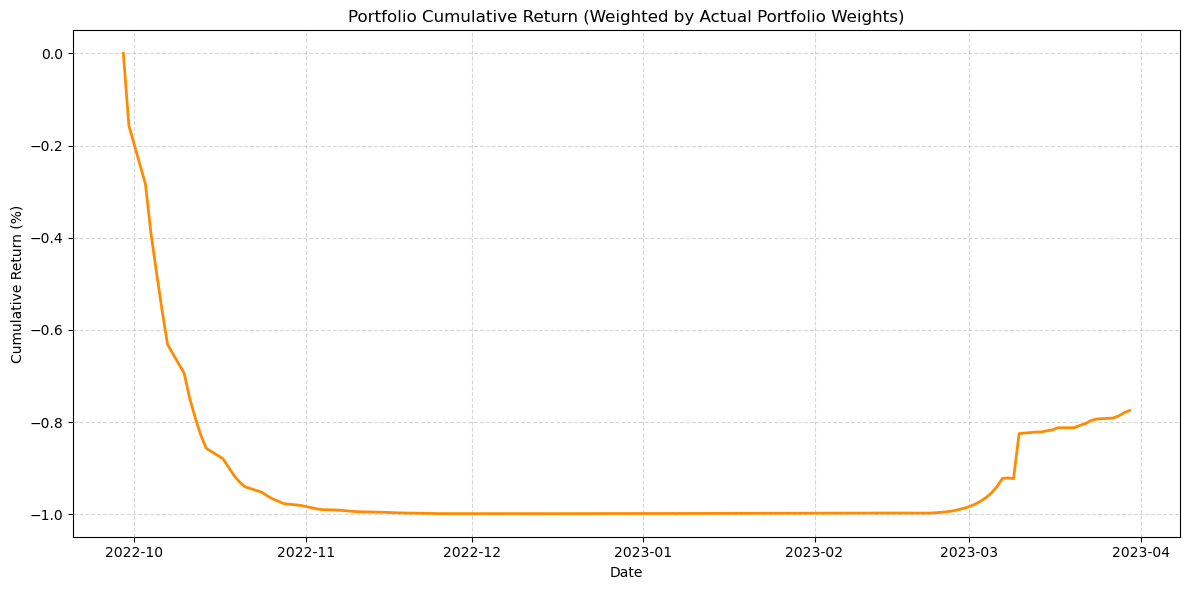

|    | refdate             |   Weighted Daily Return |   Cumulative Return |
|---:|:--------------------|------------------------:|--------------------:|
|  0 | 2022-09-29 00:00:00 |                0        |            0        |
|  1 | 2022-09-30 00:00:00 |               -0.156747 |           -0.156747 |
|  2 | 2022-10-03 00:00:00 |               -0.150302 |           -0.283489 |
|  3 | 2022-10-04 00:00:00 |               -0.150203 |           -0.391112 |
|  4 | 2022-10-05 00:00:00 |               -0.138599 |           -0.475503 |
|     | refdate             |   Weighted Daily Return |   Cumulative Return |
|----:|:--------------------|------------------------:|--------------------:|
| 131 | 2023-03-24 00:00:00 |               0.0154684 |           -0.793374 |
| 132 | 2023-03-27 00:00:00 |               0.0111102 |           -0.791079 |
| 133 | 2023-03-28 00:00:00 |               0.0213149 |           -0.786626 |
| 134 | 2023-03-29 00:00:00 |               0.0330628 |           -0.77

In [124]:
# Ensure ordered data (best practice)
df2 = df1.sort_values(['Asset Name', 'refdate'])

# Daily returns
df['Daily Return'] = df.groupby('Asset Name')['PRICE'].pct_change()


df['Weight'] = df.groupby('Asset Name')['Weight (%)'].shift(0)

# Keep rows with valid returns
df = df[df['Daily Return'].notna()]

# Weighted daily return
df['Weighted Daily Return'] = df['Weight'] * df['Daily Return']

# Portfolio-level daily return
portfolio_returns = df.groupby('refdate')['Weighted Daily Return'].sum().reset_index()


# Cumulative return
portfolio_returns['Cumulative Return'] = (1 + portfolio_returns['Weighted Daily Return']).cumprod() - 1

print(portfolio_returns)

# Plot

plt.figure(figsize=(12,6))
plt.plot( portfolio_returns['refdate'],
          portfolio_returns['Cumulative Return'],
          linewidth=2,
          color='darkorange')
plt.title('Portfolio Cumulative Return (Weighted by Actual Portfolio Weights)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(portfolio_returns.head().to_markdown())
print(portfolio_returns.tail().to_markdown())


#### Looking at the portfolio returns at a granular level (1)

In [125]:
#pivoting the data frame to have dates as the index and asset names as columns and have the prices as the value entries
pivot_df = df1.pivot_table(
    index="refdate",
    columns="Asset Name",
    values="PRICE")

pivot_df = pivot_df.sort_index()

# Replace NaN, +inf, -inf with 0 
pivot_df = pivot_df.replace([np.inf, -np.inf], 0).fillna(0)

# Daily returns
returns = pivot_df.pct_change(fill_method=None)

# Clean returns as well
returns = returns.replace([np.inf, -np.inf], 0).fillna(0)
returns


Asset Name,1102592 STATE ST USD LIQ LNAV-PRM AC,360 DIGITECH INC,360 SECURITY TECHNOLOGY INC,37 INTERACTIVE ENTERTAINMENT NET TECH GRP CO LTD,3PEAK INC,3SBIO INC,A-LIVING SMART CITY SERVICES CO LTD,AAC TECHNOLOGIES HOLDINGS INC,ABB INDIA LTD,ABOITIZ EQUITY VENTURES INC,...,ZHONGTAI SECURITIES CO LTD,ZHUZHOU CRRC TIMES ELECTRIC CO LTD,ZHUZHOU HONGDA ELECTRONICS CORP LTD,ZHUZHOU KIBING GROUP CO LTD,ZIBO QIXIANG TENGDA CHEMICAL CO LTD,ZIJIN MINING GROUP CO LTD,ZOMATO LTD,ZOOMLION HEAVY INDUST SCI & TECH LTD,ZTE CORPORATION,ZTO EXPRESS (CAYMAN) INC
refdate,,,,,,,,,,,,,,,,,,,,,
2022-09-29,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-09-30,0.0,-0.045455,-0.012066,-0.001155,0.000000,-0.014467,0.014682,-0.046687,0.000000,0.030797,...,-0.013514,0.028191,0.024675,-0.004044,0.003003,0.019750,0.018791,-0.026005,-0.014226,-0.041484
2022-10-03,0.0,0.017460,-0.007634,0.006936,0.000000,0.022018,0.036977,-0.030016,0.000000,-0.057118,...,0.004566,-0.035931,-0.027145,-0.020305,0.026946,0.005165,-0.007217,0.003641,0.003962,0.000000
2022-10-04,0.0,0.035101,0.000000,0.000000,0.000000,0.075404,0.000000,-0.032573,0.000000,-0.030755,...,0.000000,-0.004587,0.000000,0.000000,0.000000,0.000000,0.034733,0.004837,-0.005073,0.008739
2022-10-05,0.0,0.113791,0.000000,0.000000,0.000000,0.000000,-0.031008,0.000000,0.000000,0.073077,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.037893,0.000000,0.000000,0.000000,0.043317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,0.0,0.030916,0.016667,-0.005631,0.015219,-0.002558,0.000000,0.026036,0.015272,0.018482,...,0.010511,-0.009287,0.029497,0.005676,0.000000,-0.015476,-0.037987,-0.004724,0.021566,0.009551
2023-03-27,0.0,-0.013631,0.100328,0.059645,-0.029791,0.037179,0.000000,0.077278,-0.004092,-0.021968,...,-0.004458,-0.000914,0.007380,0.001881,0.002789,-0.008867,-0.010859,-0.014241,-0.042222,-0.001051
2023-03-28,0.0,0.006081,0.071514,0.005344,-0.046980,-0.006180,0.000000,0.006424,-0.006604,-0.003906,...,0.007463,-0.008696,-0.000646,-0.025352,0.012517,0.012200,0.002994,-0.009631,-0.036460,-0.012627


#### Looking at the portfolio returns at a granular level (2)

In [126]:

# 1. Asset-level daily returns
df2 = df1
df2["asset_return"] = df2.groupby("Asset Name")["PRICE"].pct_change(fill_method=None)
df2["asset_return"] = df2["asset_return"].replace([np.inf, -np.inf], 0).fillna(0)


# 2. Weighted return contribution
df2["weighted_return"] = df2["Weight (%)"]  * df2["asset_return"]

# 4. Portfolio daily return
portfolio_daily_return = df2.groupby("refdate")["weighted_return"].sum().reset_index(name="portfolio_daily_return")


# 5. Cumulative return
portfolio_daily_return = portfolio_daily_return.sort_values("refdate")
portfolio_daily_return["cumulative_portfolio_return"] = (1 + portfolio_daily_return["portfolio_daily_return"]).cumprod() - 1

portfolio_daily_return


,refdate,portfolio_daily_return,cumulative_portfolio_return
0,2022-09-29,0.000000,0.000000
1,2022-09-30,-0.156747,-0.156747
2,2022-10-03,-0.150302,-0.283489
3,2022-10-04,-0.150203,-0.391112
4,2022-10-05,-0.138599,-0.475503
...,...,...,...
131,2023-03-24,0.015468,-0.793374
132,2023-03-27,0.011110,-0.791079
133,2023-03-28,0.021315,-0.786626
134,2023-03-29,0.033063,-0.779571


#### Let's look at portfolio 30-day rolling volatility.

In [127]:
# Rolling 30-day volatility
portfolio_daily_return["rolling_30d_vol"] = portfolio_daily_return["portfolio_daily_return"].rolling(window=30).std()
portfolio_daily_return["rolling_30d_vol_ann"] = portfolio_daily_return["portfolio_daily_return"].rolling(window=30).std() * np.sqrt(252)

portfolio_daily_return

,refdate,portfolio_daily_return,cumulative_portfolio_return,rolling_30d_vol,rolling_30d_vol_ann
0,2022-09-29,0.000000,0.000000,NaN,NaN
1,2022-09-30,-0.156747,-0.156747,NaN,NaN
2,2022-10-03,-0.150302,-0.283489,NaN,NaN
3,2022-10-04,-0.150203,-0.391112,NaN,NaN
4,2022-10-05,-0.138599,-0.475503,NaN,NaN
...,...,...,...,...,...
131,2023-03-24,0.015468,-0.793374,0.251794,3.997104
132,2023-03-27,0.011110,-0.791079,0.251510,3.992596
133,2023-03-28,0.021315,-0.786626,0.251457,3.991753
134,2023-03-29,0.033063,-0.779571,0.250783,3.981062


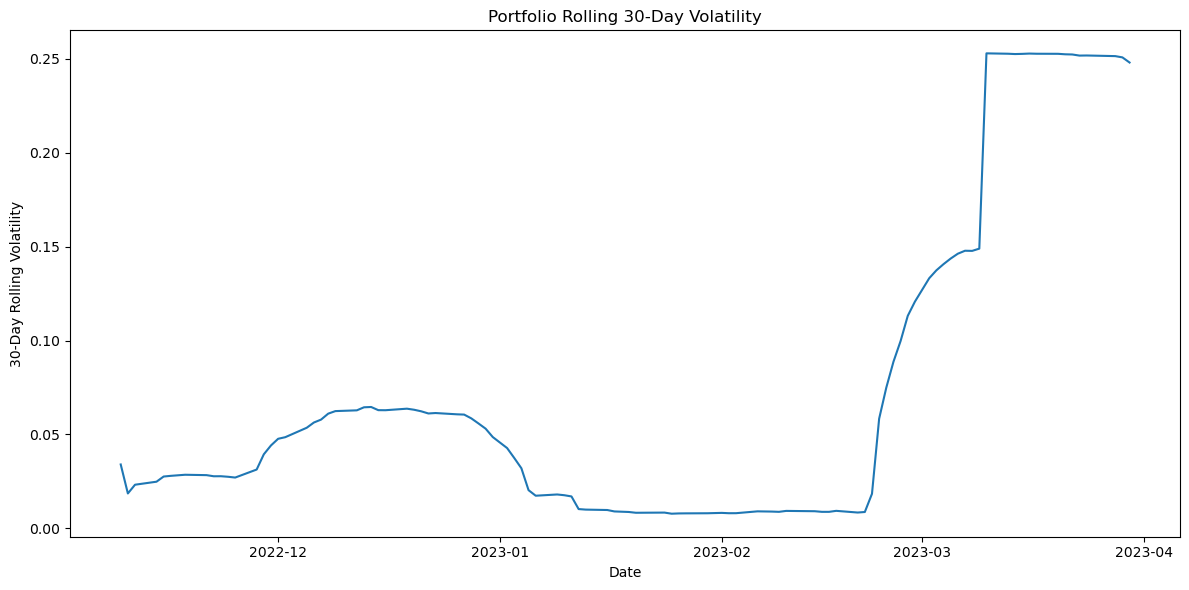

In [128]:
#plotting the 30-day rollling volatility
plt.figure(figsize=(12,6))
plt.plot(portfolio_daily_return["refdate"], portfolio_daily_return["rolling_30d_vol"])
plt.xlabel("Date")
plt.ylabel("30-Day Rolling Volatility")
plt.title("Portfolio Rolling 30-Day Volatility")
plt.tight_layout()
plt.show()


#### 3. ESG inlfuence on the portfolio

In [129]:
esg_df = df1.copy()
esg_df = esg_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Overall ESG Score", "Mkt Value"]) #removing unhelpful values and mi

# Value-weighted ESG
esg_df["Weighted_ESG"] = esg_df["Overall ESG Score"] * esg_df["Mkt Value"]

portfolio_esg = (
    esg_df.groupby("refdate")
          .apply(lambda x: x["Weighted_ESG"].sum() / x["Mkt Value"].sum())
          .reset_index(name="Portfolio_ESG")
)

portfolio_esg


/var/folders/ts/c7zf4lyd5_vfhp9pl2qmxyph0000gn/T/ipykernel_18074/809560624.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,refdate,Portfolio_ESG
0,2022-09-29,5.966251
1,2022-09-30,5.987361
2,2022-10-03,6.034022
3,2022-10-04,6.057459
4,2022-10-05,6.076674
...,...,...
131,2023-03-24,5.739776
132,2023-03-27,5.719600
133,2023-03-28,5.719241
134,2023-03-29,5.722393


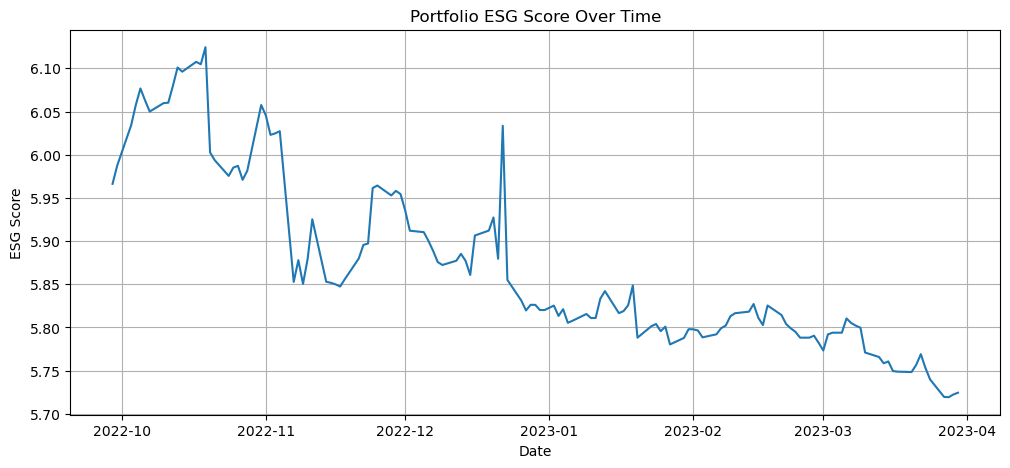

In [130]:
#plotting the ESG to look at the trend
plt.figure(figsize=(12, 5))
plt.plot(portfolio_esg["refdate"], portfolio_esg["Portfolio_ESG"])
plt.title("Portfolio ESG Score Over Time")
plt.xlabel("Date")
plt.ylabel("ESG Score")
plt.grid(True)
plt.show()


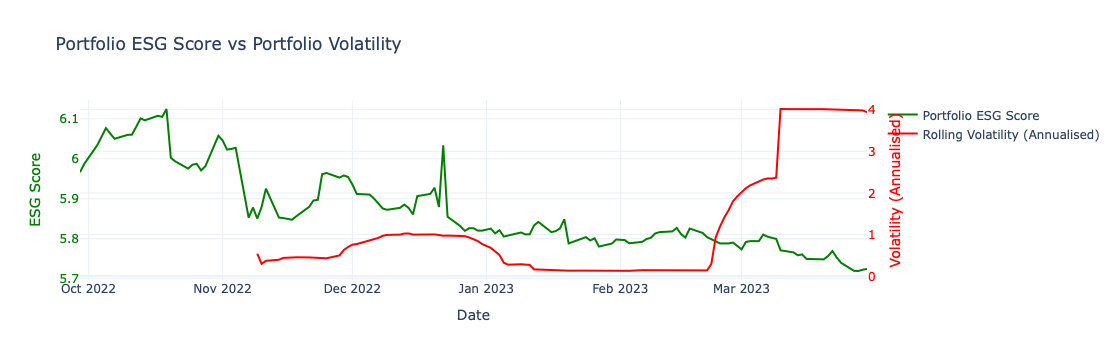

In [131]:
#Looking at ESG and Volatility of asset returns over time

# First: merge ESG and volatility on refdate
merged_plot = portfolio_esg.merge(
    portfolio_daily_return[["refdate", "rolling_30d_vol_ann"]],
    on="refdate",
    how="inner")

fig = go.Figure()

#ESG
fig.add_trace(go.Scatter(
    x=merged_plot["refdate"],
    y=merged_plot["Portfolio_ESG"],
    mode="lines",
    name="Portfolio ESG Score",
    line=dict(color="green", width=2) ))

#volatility
fig.add_trace(go.Scatter(
    x=merged_plot["refdate"],
    y=merged_plot["rolling_30d_vol_ann"],
    mode="lines",
    name="Rolling Volatility (Annualised)",
    line=dict(color="red", width=2),
    yaxis="y2" ))

fig.update_layout(
    title="Portfolio ESG Score vs Portfolio Volatility",
    xaxis_title="Date",
    yaxis=dict(title="ESG Score", color="green"),
    yaxis2=dict(
        title="Volatility (Annualised)",
        overlaying="y",
        side="right",
        color="red"
    ),
    template="plotly_white"
)

fig.show()


In [132]:

# SECTOR-ADJUSTED ESG TREND 

#  Prepare ESG dataset
esg_df = df.dropna(subset=["Overall ESG Score", "Mkt Value"]).copy()
esg_df["Weighted_ESG"] = esg_df["Overall ESG Score"] * esg_df["Mkt Value"]

# 2. Baseline sector ESG = full-period value-weighted sector ESG
sector_baseline_esg = (
    esg_df.groupby("GICS_sector")
          .agg(
              TotalWeighted=("Weighted_ESG", "sum"),
              TotalValue=("Mkt Value", "sum")
          ))

sector_baseline_esg["Baseline_Sector_ESG"] = sector_baseline_esg["TotalWeighted"] / sector_baseline_esg["TotalValue"]


sector_baseline_esg = sector_baseline_esg[["Baseline_Sector_ESG"]].reset_index()

# Compute sector weights per day
sector_weights = df.groupby(["refdate", "GICS_sector"])["Mkt Value"].sum().reset_index(name="Sector_MV")

# Sum of sector MV per date (portfolio total)
daily_totals = sector_weights.groupby("refdate")["Sector_MV"].sum().reset_index(name="Total_MV")

# Merge totals
sector_weights = sector_weights.merge(daily_totals, on="refdate", how="left")

# Compute sector weights 
sector_weights["Sector_Weight"] = sector_weights["Sector_MV"] / sector_weights["Total_MV"]

# Merge sector weights with baseline ESG
sector_adj = sector_weights.merge(sector_baseline_esg, on="GICS_sector", how="left")

# Compute sector-adjusted ESG contribution
sector_adj["Sector_Adjusted_Contribution"] = (
    sector_adj["Sector_Weight"] * sector_adj["Baseline_Sector_ESG"]
)

# Aggregate to sector-adjusted ESG per date
sector_adjusted_esg = (
    sector_adj.groupby("refdate")["Sector_Adjusted_Contribution"]
              .sum()
              .reset_index(name="Sector_Adjusted_ESG"))

# Actual ESG (value-weighted)
portfolio_esg = (
    esg_df.groupby("refdate")
          .agg(
              TotalWeighted=("Weighted_ESG", "sum"),
              TotalValue=("Mkt Value", "sum"))
          .reset_index())

portfolio_esg["Actual_Portfolio_ESG"] = portfolio_esg["TotalWeighted"] / portfolio_esg["TotalValue"]


portfolio_esg = portfolio_esg[["refdate", "Actual_Portfolio_ESG"]]


esg_compare = portfolio_esg.merge(sector_adjusted_esg, on="refdate", how="inner")

esg_compare.head()


,refdate,Actual_Portfolio_ESG,Sector_Adjusted_ESG
0,2022-09-29,NaN,0.000000
1,2022-09-30,6.605825,6.381006
2,2022-10-03,6.034022,5.828929
3,2022-10-04,6.057459,5.850492
4,2022-10-05,6.076674,5.850803


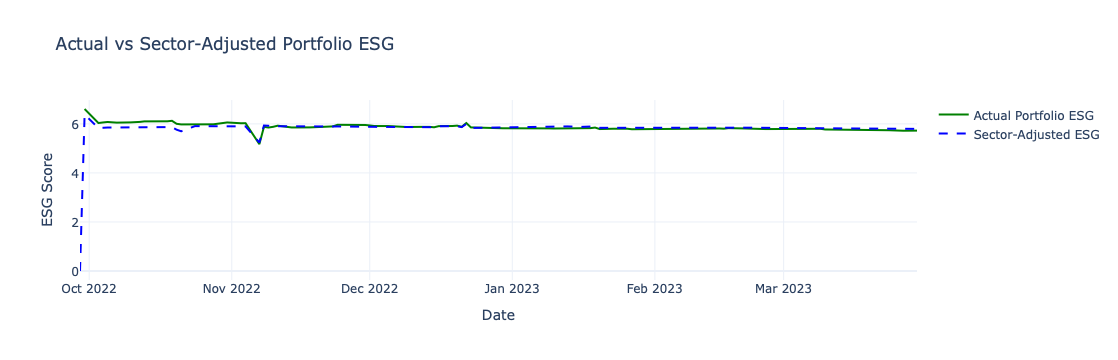

In [133]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=esg_compare["refdate"],
    y=esg_compare["Actual_Portfolio_ESG"],
    mode="lines",
    name="Actual Portfolio ESG",
    line=dict(color="green")))

fig.add_trace(go.Scatter(
    x=esg_compare["refdate"],
    y=esg_compare["Sector_Adjusted_ESG"],
    mode="lines",
    name="Sector-Adjusted ESG",
    line=dict(color="blue", dash="dash")))

fig.update_layout(
    title="Actual vs Sector-Adjusted Portfolio ESG",
    xaxis_title="Date",
    yaxis_title="ESG Score",
    template="plotly_white")
fig.show()


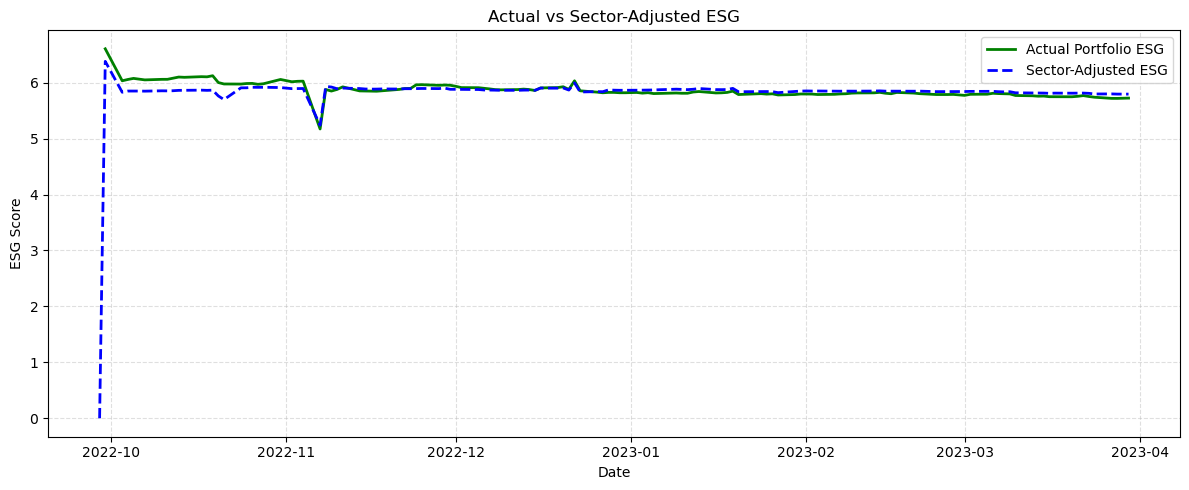

In [139]:


plt.figure(figsize=(12,5))

plt.plot(esg_compare["refdate"], esg_compare["Actual_Portfolio_ESG"],
         label="Actual Portfolio ESG", color="green", linewidth=2)

plt.plot(esg_compare["refdate"], esg_compare["Sector_Adjusted_ESG"],
         label="Sector-Adjusted ESG", color="blue", linestyle="--", linewidth=2)

plt.title("Actual vs Sector-Adjusted ESG")
plt.xlabel("Date")
plt.ylabel("ESG Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [109]:
#Portfolio beta

# Contribution to portfolio beta
df['beta_contribution'] = df['Active Weight (%)'] * df['Beta (Bmk)']

# Portfolio beta per date
portfolio_beta = (
    df.groupby('refdate')['beta_contribution']
      .sum()
      .reset_index(name='portfolio_beta')
)

portfolio_beta.head()


,refdate,portfolio_beta
0,2022-09-29,-0.165662
1,2022-09-30,0.097473
2,2022-10-03,0.109133
3,2022-10-04,0.114657
4,2022-10-05,0.125751


In [110]:
#beta trend over time

chart_beta = (
    alt.Chart(portfolio_beta)
    .mark_line(point=True, strokeWidth=2)
    .encode(
        x=alt.X("refdate:T", title="Date"),
        y=alt.Y("portfolio_beta:Q", title="Portfolio Beta"),
        tooltip=["refdate:T", "portfolio_beta:Q"]
    )
    .properties(
        title="Portfolio Beta Over Time",
        width=700,
        height=350
    )
)

chart_beta


alt.Chart(...)

In [112]:
#Rolling 30 -Day beta

portfolio_beta['rolling_beta_30'] = (
    portfolio_beta['portfolio_beta']
    .rolling(window=30, min_periods=5)
    .mean()
)

chart_rolling = (
    alt.Chart(portfolio_beta)
    .mark_line(strokeDash=[3,3], strokeWidth=2)
    .encode(
        x="refdate:T",
        y="rolling_beta_30:Q",
        tooltip=["refdate:T", "rolling_beta_30:Q"]
    )
    .properties(
        title="Rolling 30-Day Portfolio Beta",
        width=700,
        height=350
    )
)

chart_rolling


alt.Chart(...)